<a href="https://colab.research.google.com/github/kshitijain902/Deep_learning/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


batch_size = 32
img_height = 256
img_width = 256

train_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/cnn/drive-download-20230506T055812Z-001',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 724 files belonging to 4 classes.


In [ ]:
tf.keras.layers.Rescaling(
    scale=1./255, offset=0.0
)

In [ ]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs', 'horses', 'humans']


TypeError: ignored

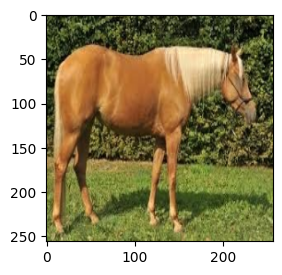

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32, 4)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)


In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.03346097 1.0


In [ ]:
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation="softmax")
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_15 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)       

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  epochs=epochs
)

Epoch 1/10
23/23 [==============================] - 2s 38ms/step - loss: 1.6238 - accuracy: 0.2873
Epoch 2/10
23/23 [==============================] - 1s 34ms/step - loss: 1.0964 - accuracy: 0.5304
Epoch 3/10
23/23 [==============================] - 1s 34ms/step - loss: 0.8580 - accuracy: 0.6064
Epoch 4/10
23/23 [==============================] - 1s 34ms/step - loss: 0.6360 - accuracy: 0.7251
Epoch 5/10
23/23 [==============================] - 1s 34ms/step - loss: 0.4989 - accuracy: 0.7956
Epoch 6/10
23/23 [==============================] - 1s 36ms/step - loss: 0.3577 - accuracy: 0.8840
Epoch 7/10
23/23 [==============================] - 1s 36ms/step - loss: 0.2216 - accuracy: 0.9227
Epoch 8/10
23/23 [==============================] - 1s 34ms/step - loss: 0.1081 - accuracy: 0.9696
Epoch 9/10
23/23 [==============================] - 1s 34ms/step - loss: 0.0413 - accuracy: 0.9959
Epoch 10/10
23/23 [==============================] - 1s 35ms/step - loss: 0.0198 - accuracy: 0.9972
